Computer vision lab 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2, ifft2, fftshift
from scipy.signal import convolve2d

from Functions import *
from gaussfft import gaussfft
from fftwave import fftwave

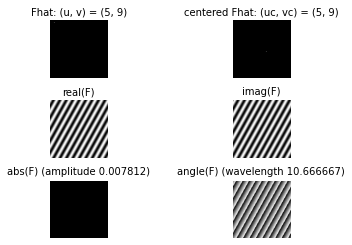

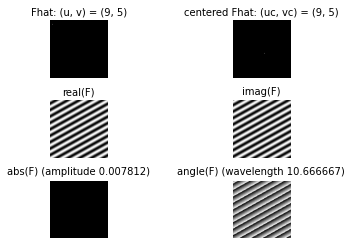

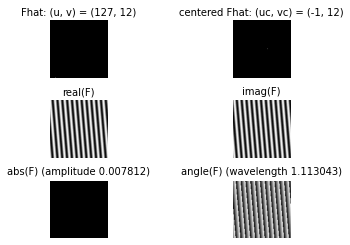

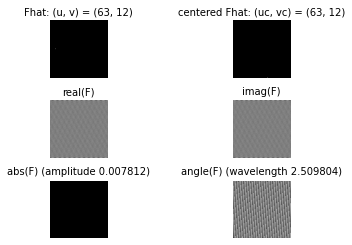

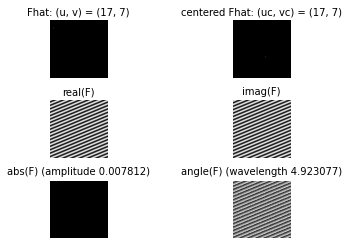

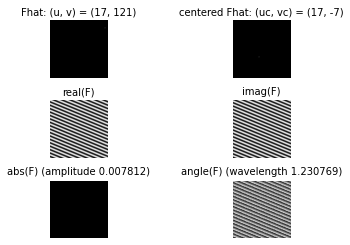

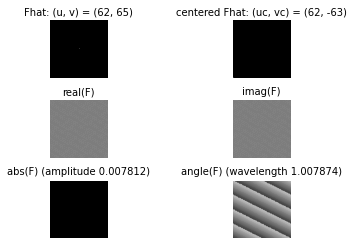

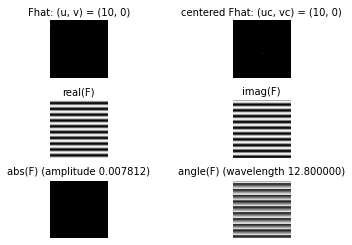

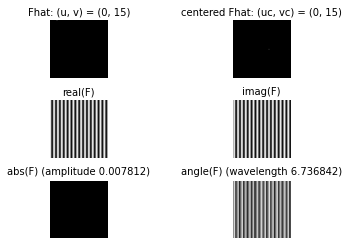

In [3]:
#Exercise 1.3 Basis functions
##Fhat= np.zeros((128,128))
'''
(p,q)=(5,9)
Fhat[p,q]=1
#showgrey(Fhat)
/*F=ifft2(Fhat)
showgrey(F)
Fabsmax = np.max(np.abs(F))
print('real part')
showgrey(np.real(F), True, 64, -Fabsmax, Fabsmax)
print('imaginary part')
showgrey(np.imag(F), True, 64, -Fabsmax, Fabsmax)
print('magnitude')
showgrey(np.abs(F), True, 64, -Fabsmax, Fabsmax)
print('phase')
showgrey(np.angle(F), True, 64, -np.pi, np.pi)
'''
fftwave(5,9)
fftwave(9,5)
fftwave(127,12)
fftwave(63,12)
fftwave(17,7)
fftwave(17,121)
fftwave(62,65)
fftwave(10,0)
fftwave(0,15)

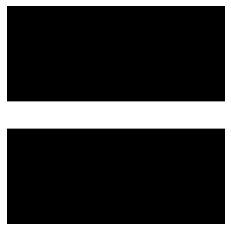

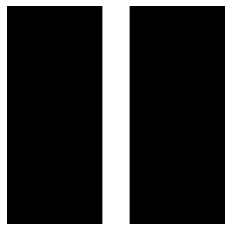

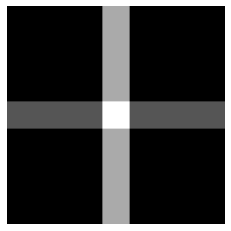

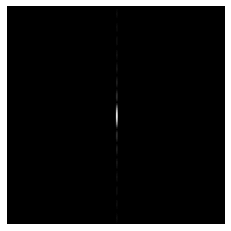

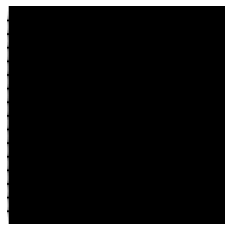

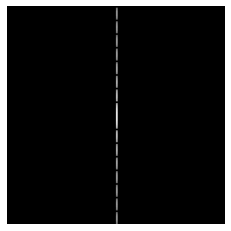

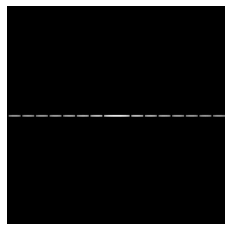

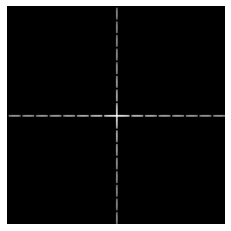

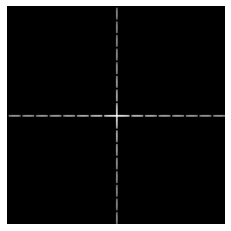

In [9]:
#1.4 Linearity
from Functions import showfs

F = np.concatenate([np.zeros((56,128)), np.ones((16,128)), np.zeros((56,128))])
G = F.T
H = F + 2*G
Fhat = fft2(F)
Ghat = fft2(G)
Hhat = fft2(H)

showgrey(F)
showgrey(G)
showgrey(H)
showgrey(fftshift(np.abs(Fhat)))
showgrey(np.log(1+abs(Fhat)))

#showgrey(Hhat)
showfs(Fhat)
showfs(Ghat)
showfs(Hhat)
showfs(Fhat+2*Ghat)
#without log

#def showfs(Image, display = True, res = 64):
#	showgrey(np.log(1 + np.abs(np.fft.fftshift(Image))), display, res)

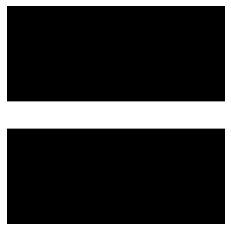

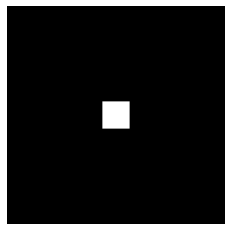

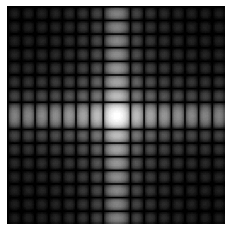

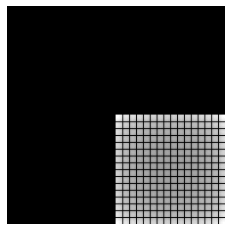

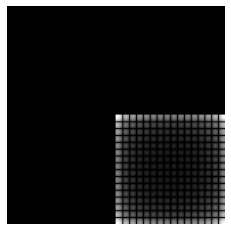

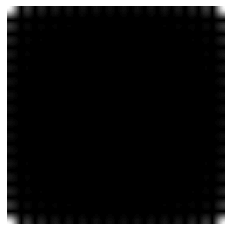

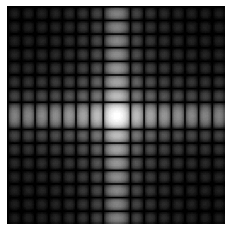

In [10]:
#1.5 Multiplication

F = np.concatenate([np.zeros((56,128)), np.ones((16,128)), np.zeros((56,128))])
G = F.T
showgrey(F)
showgrey(F * G)
showfs(fft2(F * G))
A=convolve2d(fft2(F),fft2(G))
showfs(A)
C=A/(128*128)
showfs(C)
D=C[0:128,0:128]
showgrey(np.log(1 + np.abs(np.fft.fftshift(D))))

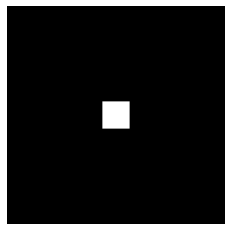

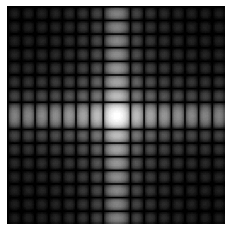

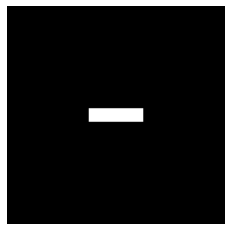

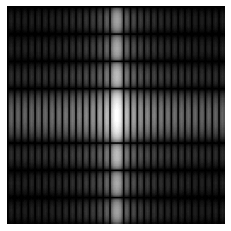

In [63]:
#1.6 Scaling
F1 = np.concatenate([np.zeros((56,128)), np.ones((16,128)), np.zeros((56,128))])
G1 = F1.T
showgrey(F1 * G1)
showfs(fft2(F1 * G1))


F = np.concatenate([np.zeros((60,128)), np.ones((8,128)), np.zeros((60,128))]) * \
np.concatenate([np.zeros((128,48)), np.ones((128,32)), np.zeros((128,48))], axis=1)
showgrey(F)
showfs(fft2(F))

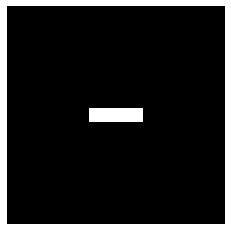

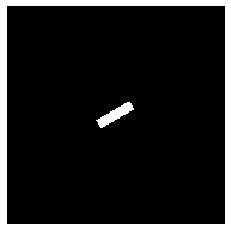

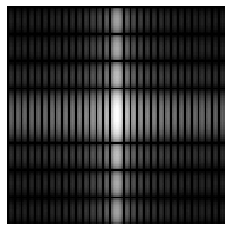

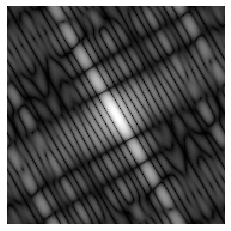

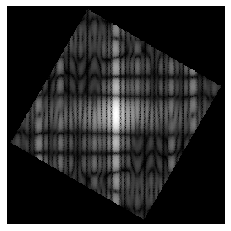

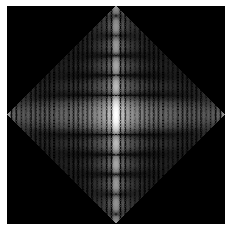

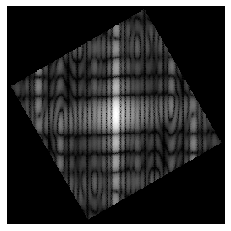

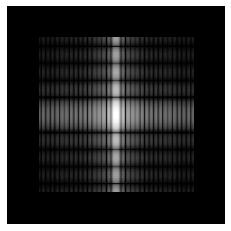

In [2]:
#1.7 Rotation
F = np.concatenate([np.zeros((60,128)), np.ones((8,128)), np.zeros((60,128))]) * \
np.concatenate([np.zeros((128,48)), np.ones((128,32)), np.zeros((128,48))], axis=1)
alpha=30

G = rot(F, alpha )
showgrey(F)
showgrey(G)
showfs(fft2(F))
Ghat=fft2(G)
showfs(Ghat)

Hhat = rot(fftshift(Ghat), -alpha )
showgrey(np.log(1 + abs(Hhat)))

alpha1=45
Ghat1 = fft2(rot(F, alpha1 ))
Hhat = rot(fftshift(Ghat1), -alpha1 )
showgrey(np.log(1 + abs(Hhat)))

alpha2=60
Ghat2= fft2(rot(F, alpha2 ))
Hhat = rot(fftshift(Ghat2), -alpha2 )
showgrey(np.log(1 + abs(Hhat)))

alpha3=90
Ghat3 = fft2(rot(F, alpha3 ))
Hhat = rot(fftshift(Ghat3), -alpha3 )
showgrey(np.log(1 + abs(Hhat)))


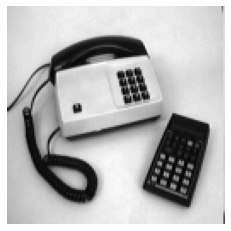

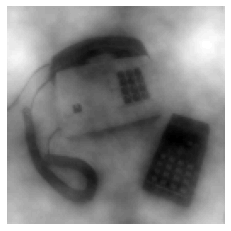

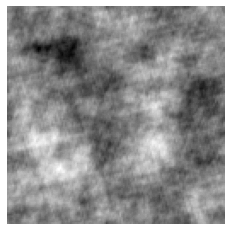

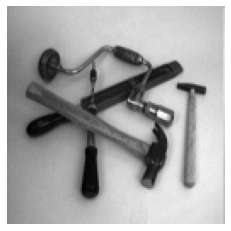

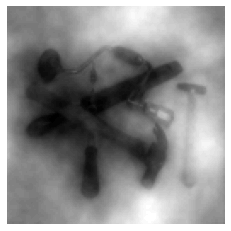

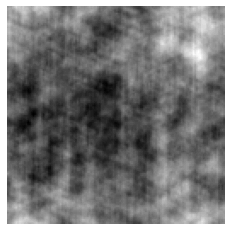

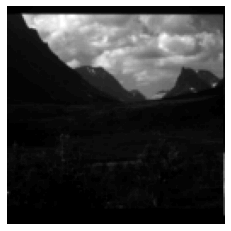

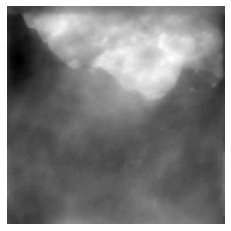

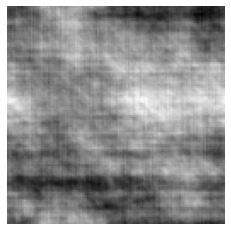

In [87]:
#1.8 Information in Fourier phase and magnitude

img=np.load("Images-npy/phonecalc128.npy")
timg=pow2image(img)
rimg=randphaseimage(img)
showgrey(img)
showgrey(timg)
showgrey(rimg)

img=np.load("Images-npy/few128.npy")
timg=pow2image(img)
rimg=randphaseimage(img)
showgrey(img)
showgrey(timg)
showgrey(rimg)

img=np.load("Images-npy/nallo128.npy")
timg=pow2image(img)
rimg=randphaseimage(img)
showgrey(img)
showgrey(timg)
showgrey(rimg)

Question 14


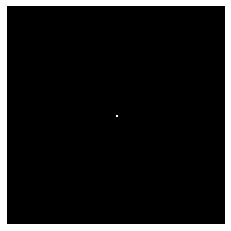

[[1.32967252e-02 5.01820807e-14]
 [5.01820807e-14 1.32967252e-02]]
Question 16


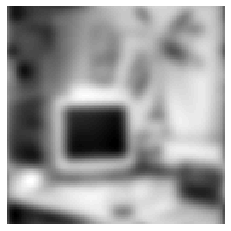

In [17]:
#Exercice 2.3
def gaussfft(pic, t):
    
    #Step 1
    gauss = np.zeros(np.shape(pic))
    s1,s2 = np.shape(pic)
    for n in range(-int(s1/2),int(s1/2)):
        for m in range(-int(s2/2),int(s2/2)):
            gauss[n,m] = (1/(2*np.pi*t))*np.exp(-(m**2 + n**2)/(2*t))
            
    #Step 2
    trans_gauss = fft2(gauss)
    trans_image = fft2(pic)
    
    #Step 3
    fourier = trans_gauss*trans_image
    
    #Step 4
    result = ifft2(fourier)
    
    
    # result = ...  
    return result


office1 = np.load("Images-npy/office128.npy")

#Question 14
print('Question 14')

psf = gaussfft(deltafcn(128, 128), 0.1)   #Modify the last parameter to vary t
showgrey((np.abs(psf)), True)
print(variance(psf))

#Question 16
print('Question 16')

psf2 = gaussfft(office1, 10) 
showgrey((np.abs(psf2)), True)

Original image


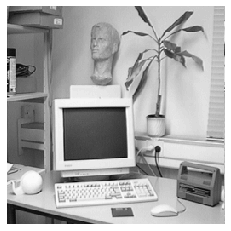

Gauss noise


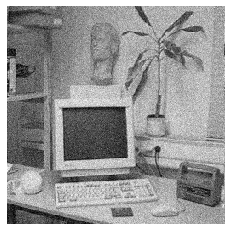

Sap noise


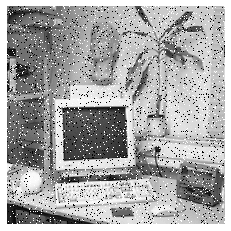

In [19]:
#Exercise 3.1 - Noises

office = np.load("Images-npy/office256.npy")

def gaussfft(pic, t):
    
    #Step 1
    gauss = np.zeros(np.shape(pic))
    s1,s2 = np.shape(pic)
    for n in range(-int(s1/2),int(s1/2)):
        for m in range(-int(s2/2),int(s2/2)):
            gauss[n,m] = (1/(2*np.pi*t))*np.exp(-(m**2 + n**2)/(2*t))
            
    #Step 2
    trans_gauss = fft2(gauss)
    trans_image = fft2(pic)
    
    #Step 3
    fourier = trans_gauss*trans_image
    
    #Step 4
    result = ifft2(fourier)
    
    
    # result = ...  
    return result


print('Original image')
showgrey(office, True)

print('Gauss noise')
add = gaussnoise(office, 16)
showgrey((np.abs(add)), True)

print('Sap noise')
sap = sapnoise(office,0.1,255)
showgrey((np.abs(sap)), True)

Gaussian filter


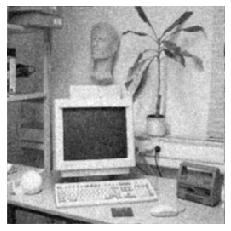

Median filter


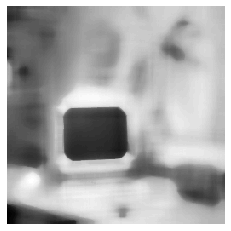

Low-pass filter


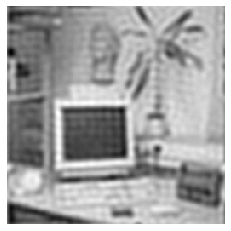

In [20]:
#Exercise 3.1 - Gauss noise

office = np.load("Images-npy/office256.npy")

def gaussfft(pic, t):
    
    #Step 1
    gauss = np.zeros(np.shape(pic))
    s1,s2 = np.shape(pic)
    for n in range(-int(s1/2),int(s1/2)):
        for m in range(-int(s2/2),int(s2/2)):
            gauss[n,m] = (1/(2*np.pi*t))*np.exp(-(m**2 + n**2)/(2*t))
            
    #Step 2
    trans_gauss = fft2(gauss)
    trans_image = fft2(pic)
    
    #Step 3
    fourier = trans_gauss*trans_image
    
    #Step 4
    result = ifft2(fourier)
    
    
    # result = ...  
    return result


add = gaussnoise(office, 16)

print('Gaussian filter')
res_gauss = gaussfft(add, 0.6)  #Modify the last parameter to vary t
showgrey((np.abs(res_gauss)), True)

print('Median filter')
res_med = medfilt(add, 20)  #Modify the last parameter to vary w
showgrey((np.abs(res_med)), True)

print('Low-pass filter')
res_low = ideal(add, 0.1)  #Modify the last parameter to vary f
showgrey((np.abs(res_low)), True)

Gaussian filter


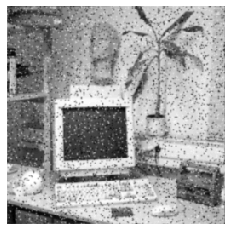

Median filter


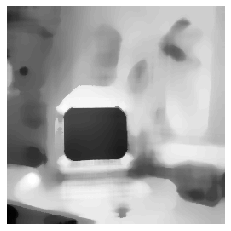

Low-pass filter


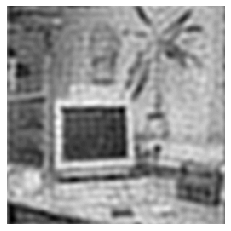

In [24]:
#Exercise 3.1 - Sap noise

office = np.load("Images-npy/office256.npy")

def gaussfft(pic, t):
    
    #Step 1
    gauss = np.zeros(np.shape(pic))
    s1,s2 = np.shape(pic)
    for n in range(-int(s1/2),int(s1/2)):
        for m in range(-int(s2/2),int(s2/2)):
            gauss[n,m] = (1/(2*np.pi*t))*np.exp(-(m**2 + n**2)/(2*t))
            
    #Step 2
    trans_gauss = fft2(gauss)
    trans_image = fft2(pic)
    
    #Step 3
    fourier = trans_gauss*trans_image
    
    #Step 4
    result = ifft2(fourier)
    
    
    # result = ...  
    return result


sap = sapnoise(office, 0.1, 255)

print('Gaussian filter')
res_gauss = gaussfft(sap, 0.6)  #Modify the last parameter to vary t
showgrey((np.abs(res_gauss)), True)

print('Median filter')
res_med = medfilt(sap, 20)  #Modify the last parameter to vary w
showgrey((np.abs(res_med)), True)

print('Low-pass filter')
res_low = ideal(sap, 0.1)  #Modify the last parameter to vary f
showgrey((np.abs(res_low)), True)

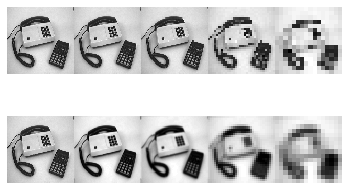

In [4]:
#Exercise 3.2 - Gaussian filter

def gaussfft(pic, t):
    
    #Step 1
    gauss = np.zeros(np.shape(pic))
    s1,s2 = np.shape(pic)
    for n in range(-int(s1/2),int(s1/2)):
        for m in range(-int(s2/2),int(s2/2)):
            gauss[n,m] = (1/(2*np.pi*t))*np.exp(-(m**2 + n**2)/(2*t))
            
    #Step 2
    trans_gauss = fft2(gauss)
    trans_image = fft2(pic)
    
    #Step 3
    fourier = trans_gauss*trans_image
    
    #Step 4
    result = ifft2(fourier)
    
    
    # result = ...  
    return result

img = np.load("Images-npy/phonecalc256.npy")
smoothimg = img
N=5
f = plt.figure()
f.subplots_adjust(wspace=0, hspace=0)
for i in range(N):
    if i>0: # generate subsampled versions
        img = rawsubsample(img)
        smoothimg = gaussfft(smoothimg, 1) #Modify the last parameter to vary t
        smoothimg = rawsubsample(smoothimg)
    f.add_subplot(2, N, i + 1)
    showgrey(img, False)
    f.add_subplot(2, N, i + N + 1)
    showgrey(smoothimg, False)
plt.show()

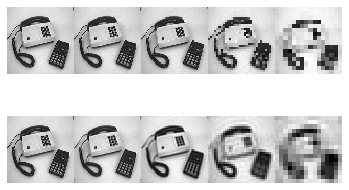

In [28]:
img = np.load("Images-npy/phonecalc256.npy")
smoothimg = img
N=5
f = plt.figure()
f.subplots_adjust(wspace=0, hspace=0)
for i in range(N):
    if i>0: # generate subsampled versions
        img = rawsubsample(img)
        smoothimg = ideal(smoothimg, 0.2)   #Modify the last parameter to vary f
        smoothimg = rawsubsample(smoothimg)
    f.add_subplot(2, N, i + 1)
    showgrey(img, False)
    f.add_subplot(2, N, i + N + 1)
    showgrey(smoothimg, False)
plt.show()